
# Sudio 🎵

[![PyPI version](https://badge.fury.io/py/sudio.svg)](https://badge.fury.io/py/sudio)
[![PyPI Downloads](https://static.pepy.tech/badge/sudio)](https://www.pepy.tech/projects/sudio)
[![Documentation Status](https://img.shields.io/badge/docs-github%20pages-blue)](https://mrzahaki.github.io/sudio/)
[![Build Status](https://github.com/mrzahaki/sudio/actions/workflows/python-package.yml/badge.svg)](https://github.com/mrzahaki/sudio/actions/workflows/python-package.yml)
[![Python Version](https://img.shields.io/pypi/pyversions/sudio.svg)](https://pypi.org/project/sudio/)
[![Supported OS](https://img.shields.io/badge/OS-Linux%20%7C%20macOS%20%7C%20Windows-blue)](https://shields.io/)
[![License](https://img.shields.io/badge/License-Apache%202.0-blue.svg)](https://opensource.org/licenses/Apache-2.0)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mrzahaki/sudio/blob/Master/docs/_static/sudio.ipynb)


Sudio is a Python library for audio processing and manipulation, providing set of tools for working with digital audio files. It supports operations like time-domain slicing, frequency filtering, audio mixing, streaming, and effect application across various audio formats, making complex audio engineering tasks accessible through a streamlined, Pythonic interface.


## 📚 Documentation

For detailed documentation and examples, visit the [Sudio Documentation](https://mrzahaki.github.io/sudio/).


Install Sudio using pip:

In [ ]:
!pip install --upgrade --no-deps sudio


In [ ]:
!wget "https://drive.usercontent.google.com/download?id=1dCLkVYBjj1sUxsv_YeVG3oL-RMAbvKfE&export=download&authuser=0" -O ariyayee.mp3

In [ ]:
import sudio

# Create an audio master instance
su = sudio.Master()

# Load the audio file
song = su.add('ariyayee.mp3')

## Audio Manipulation

### Time Domain Slicing

You can easily slice audio files to play specific segments:

In [ ]:
# Play a specific segment of the song from 12 seconds to 27.66 seconds
su.echo(song[12: 27.66])

# Play the last 12 seconds of the song
su.echo(song[-12: ])

# Reverse play the song from 30 seconds to 15 seconds
su.echo(song[30:15])

### Audio Speed Manipulation

In [ ]:
# Increase playback speed by 1.2x for a specific slice (10 to 30 seconds)
faster_slice = song[10:30:1.2]

# Decrease playback speed by 0.75x and play a subsection from 20 seconds of that slice
slower_slice = song[20:30:0.75]

su.echo(faster_slice, slower_slice[5:])

# Remove references to release occupied static and dynamic resources.
faster_slice = slower_slice = _


An AudioWrap object can be sliced using standard Python slice syntax `x[start: stop: speed_ratio]`,
where `x` is the wrapped object(in this case record).

    - `speed_ratio` > 1 increases playback speed (reduces duration).
    - `speed_ratio` < 1 decreases playback speed (increases duration).
    - Default `speed_ratio` is 1.0 (original speed).
    - Speed adjustments preserve pitch.


### Combining Audio Segments

You can join multiple segments of audio:

method 1:

In [ ]:
su.echo(song[12: 27.66, 80: 65: .8])

for time domain slicing use `[i: j: k, i(2): j(2): k(2), i(n): j(n): k(n)]` syntax, where:

  - `i` is the start time,
  - `j` is the stop time,
  - `k` is the `speed_ratio`, which adjusts the playback speed.

This selects `nXm` seconds with index times:

`i, i+1, ..., j`, `i(2), i(2)+1, ..., j(2)`, ..., `i(n), ..., j(n)` where `m = j - i` (`j > i`).

Note For `i < j`, `i` is the stop time and `j` is the start time, meaning audio data is read inversely.

method 2:

In [ ]:
result = song[12: 27.66].join(song[65: 80])
medley = song[10:20].join(song[5.6: 7.8], song[70:80], song[1.2:3.2])
su.echo(result, medley)

result = medley = _

The join() method merges segments from different audio files into a seamless stream.
For example, a segment from baroon.mp3 is combined with one from asemoon.ogg.
You can also join multiple segments from various files, like two from baroon.mp3 and one from asemoon.ogg, to create a medley.
This is perfect for mashups or audio compilations by stitching together parts of different tracks.


### Mixing Tracks


In [ ]:
# Add the two songs
combined = song[2:10] *-10 + song[4:20] * -2

# Play the combined audio
su.echo(combined)

# Print durations
print(f"song duration: {song.get_duration()} seconds")
print(f"Combined duration: {combined.get_duration()} seconds")

song duration: 215.6932426303855 seconds
Combined duration: 16.00018140589569 seconds


When adding two AudioWrap objects, the combined audio will be as long as the longer one, mixing overlapping parts.

## Audio Basic Effects

### Gain Adjustment

In Gain Adjustment, we modify the audio's gain (volume) using decibel (dB) units.
You can adjust the gain either directly via multiplication or using the afx() method to apply gain dynamically within specific time ranges:

In [ ]:
# Increase gain by 2 dB
loud_segment = song[10:20] * 2

# Decrease gain by 6 dB
quiet_segment = song[30:40] * -6

# Play the loud and quiet segments together
su.echo(loud_segment.join(quiet_segment))

loud_segment = quiet_segment = _

In this method, the * operator adjusts the gain by applying a dB value.
The result is a segment with increased or decreased volume, represented in dB.
The scale is converted from dB to amplitude using a formula, and soft clipping is applied to prevent distortion.


Method 2: Applying Gain Using Effects (AFX)

In [ ]:
from sudio.process.fx import Gain
# Apply dynamic gain adjustment from 2s to 5s in the segment
afx = song.afx(Gain, gain_db=-30, start=2, stop=10, wet_mix=0.9)
su.echo(afx)

afx = _

In this approach, the afx() method applies a dynamic gain effect to a specific segment of the track.
Here, gain is reduced by -30 dB from 2s to 5s. The wet_mix parameter determines how much of the effect is applied, where 1 means full effect and 0 means no effect.
The gain_db is in dB units, allowing for precise control over volume adjustments.

### Applying Filters

Apply frequency filters to audio:

In [ ]:
sliced = song[35: 40.1]

# Apply a low-pass filter (keep frequencies below 1000 Hz)
low_pass = sliced[:'1000']

# Apply a high-pass filter (keep frequencies above 500 Hz)
high_pass = sliced['500':]

# Apply a band-pass filter (keep frequencies between 500 Hz and 2000 Hz)
band_pass = sliced['500':'2000']

# apply a 6th-order band-stop filter to the audio segment from 5 to 10 seconds
# with a -0.8 dB attenuation, effectively suppresses this range
band_stop = sliced['200': '1000': 'order=6, scale=-.8']

su.echo(low_pass.join(high_pass, band_pass, band_stop))

low_pass = high_pass = band_pass = band_stop = sliced = _


Use `['i': 'j': 'filtering options', 'i(2)': 'j(2)': 'options(2)', ..., 'i(n)': 'j(n)': 'options(n)']` syntax, where:
- `i` is the starting frequency,
- `j` is the stopping frequency (string type, in the same units as `fs`).

This activates `n` IIR filters with specified frequencies and options.

Slice Syntax for Filtering:

  - `x=None`, `y='j'`: Low-pass filter with a cutoff frequency of `j`.
  - `x='i'`, `y=None`: High-pass filter with a cutoff frequency of `i`.
  - `x='i'`, `y='j'`: Band-pass filter with critical frequencies `i`, `j`.
  - `x='i'`, `y='j'`, `options='scale=[negative value]'`: Band-stop filter with critical frequencies `i`, `j`.


Filtering Options:

  - `ftype` : str, optional
      Type of IIR filter to design. Options: `'butter'` (default), `'cheby1'`, `'cheby2'`, `'ellip'`, `'bessel'`.
  - `rs` : float, optional
      Minimum attenuation in the stop band (dB) for Chebyshev and elliptic filters.
  - `rp` : float, optional
      Maximum ripple in the passband (dB) for Chebyshev and elliptic filters.
  - `order` : int, optional
      The order of the filter. Default is 5.
  - `scale` : float or int, optional
      Attenuation or amplification factor. Must be negative for a band-stop filter.


### Simple two-band EQ

In [ ]:
new_song = song[40:60, : '200': 'order=4, scale=.8', '200'::'scale=.5'] * 1.7
su.echo(new_song)

new_song = _


Here, a two-band EQ tweaks specific frequencies within a 40-60 second audio slice.
First, a 4th-order low-pass filter reduces everything below 200 Hz, scaled by 0.8 to lower low frequencies.
Next, a 5th-order high-pass filter handles frequencies above 200 Hz, scaled by 0.5 to soften the highs.
After filtering, the overall volume is boosted by 1.7db to balance loudness.
Finally, the processed audio is played using master.echo(), revealing how these adjustments shape the
sound—perfect for reducing noise or enhancing specific frequency ranges.


### Low-Frequency Temporal Echo Manipulation

In [ ]:
combined = song[2:15] * -5 + song[2.2:15:.95, :'300']
su.echo(combined)

This audio processing technique creates a unique effect by blending the original audio with a time-shifted, filtered version.
It takes an 8-second slice (2 to 10 seconds), shifts it by 200 milliseconds (2.2 to 10.2 seconds), and applies a low-pass filter that retains only frequencies below 300 Hz.
The shifted slice is played at 0.8x speed and combined with the original, producing a subtle echo-like texture that enhances low-frequency sounds.
This approach is ideal for atmospheric sound design, adding depth to music, or creating dynamic audio transitions.

### Custom Fade-In Effect

In [ ]:
from sudio.types import SampleFormat
import numpy as np

sliced = song[:30]
fade_length = int(song.get_sample_rate() * 5)  # 5-second fade
fade_in = np.linspace(0, 1, fade_length)

with sliced.unpack(astype=SampleFormat.FLOAT32, start=2, stop=20) as data:
    data[:, :fade_length] *= fade_in
    sliced.set_data(data)

su.echo(sliced)
su.export(sliced, 'modified_song.mp3', bitrate=128, quality=.7)

In [ ]:
modified = su.add('./modified_song.mp3')
su.echo(modified)

The audio file example.mp3 is loaded into sudio.Master(), where a 5-second fade-in is applied using np.linspace to adjust the volume based on the sample rate.
The unpack method  extracts audio between 2 and 20 seconds in FLOAT32 format for precise processing, with normalization handled via the astype parameter to prevent distortion.

After processing, the audio is repacked and saved as modified_song.ogg.
The unpack method supports resetting (reset=True), format conversion (astype), time range selection (start/stop), and truncation (truncate=True),
enabling precise audio manipulation without re-encoding, ensuring high performance and minimal data loss.


## Advanced Effect Application


The `afx()` method provides a powerful way to apply audio effects dynamically to specific time ranges within an audio segment. It supports precise control over effect parameters, timing, and mix levels.

### Gain Effect Dynamics

Apply gain adjustments to specific segments with fine-grained control:

In [ ]:
from sudio.process.fx import Gain

sliced = song[10:20]

# Reduce volume by -30 dB from 2s to 5s within the segment
sliced = sliced.afx(Gain, gain_db=-30, start=2, stop=5)
su.echo(sliced)

- `start`: Beginning of effect application (in segment time)
- `stop`: End of effect application (in segment time)
- `wet_mix`: Effect intensity (0.0 to 1.0)

  - 0.0: No effect
  - 1.0: Full effect
  - Values between 0 and 1 allow blending

### Tempo Time Stretching

Dynamically modify audio tempo:

In [ ]:
from sudio.process.fx import Tempo

sliced = song[10:41]

# Slow down segment to 0.8x speed
tempo = (
    sliced
    .afx(Tempo, tempo=0.7, start=6, stop=15)
    .afx(Tempo, tempo=1.7, start=6+7/.7)
)
su.echo(tempo)

### Envelope Shaping with FadeEnvelope

Apply various envelope presets or create custom amplitude shapes. For more details and predefined presets, see the sudio.process submodule.


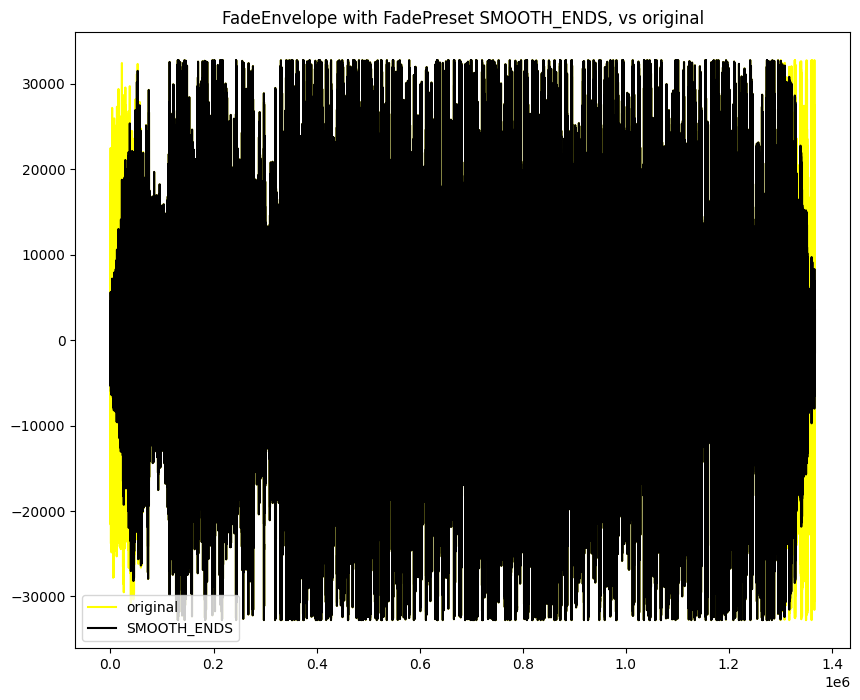

In [ ]:
from sudio.process.fx import FadeEnvelope, FadePreset
import matplotlib.pyplot as plt
import numpy as np


songseg = song[10:41]

# Predefined Envelope Presets
# Smooth fade at segment ends
songseg_smooth_ends = songseg.afx(FadeEnvelope, preset=FadePreset.SMOOTH_ENDS, enable_spline=True)
su.echo(songseg_smooth_ends)

plt.figure(1, (10, 8))
with songseg.unpack() as songseg_data:
    with songseg_smooth_ends.unpack() as songseg_smooth_ends_data:
        plt.plot(songseg_data[0, :], color='yellow', label='original')
        plt.plot(songseg_smooth_ends_data[0, :], color='black', label='SMOOTH_ENDS')

plt.title('FadeEnvelope with FadePreset SMOOTH_ENDS, vs original')
plt.legend()


The SUDIO library's FadeEnvelope effect offers a powerful toolkit for audio envelope manipulation, enabling sound designers to precisely shape audio dynamics.
By loading an audio file and applying various preset and custom envelope transformations, users can create nuanced sonic textures with ease.


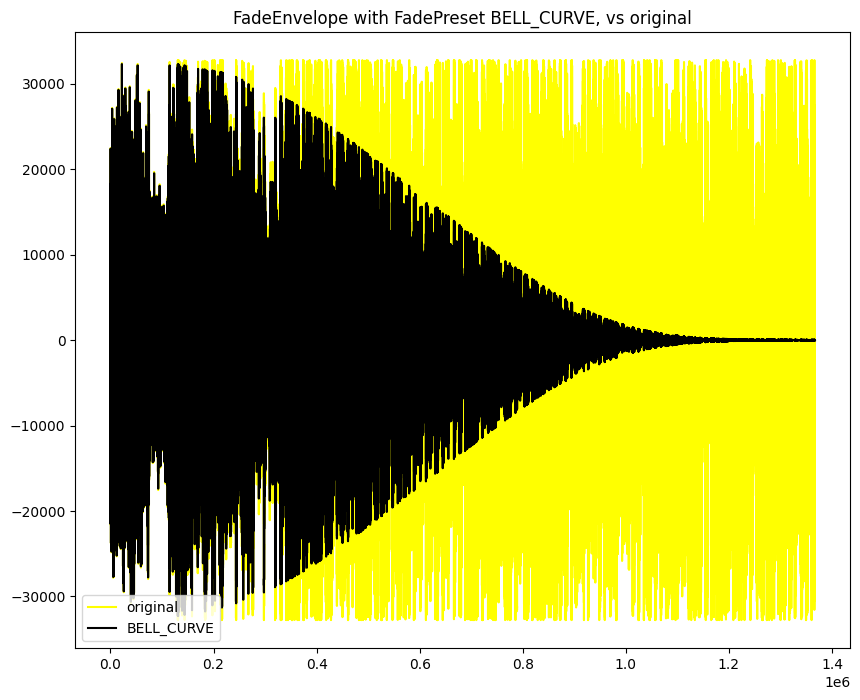

In [ ]:
from sudio.process.fx import FadeEnvelope, FadePreset
import matplotlib.pyplot as plt
import numpy as np


songseg = song[10:41]

# Predefined Envelope Presets
songseg_fade_envelope = songseg.afx(FadeEnvelope, preset=FadePreset.BELL_CURVE)

su.echo(songseg_fade_envelope)

plt.figure(1, (10, 8))
with songseg.unpack() as songseg_data:
    with songseg_fade_envelope.unpack() as songseg_fade_envelope_data:
        plt.plot(songseg_data[0, :], color='yellow', label='original')
        plt.plot(songseg_fade_envelope_data[0, :], color='black', label='BELL_CURVE')

plt.title('FadeEnvelope with FadePreset BELL_CURVE, vs original')
plt.legend()

c:\Users\Hossein\Documents\Programming\Py\sudio\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


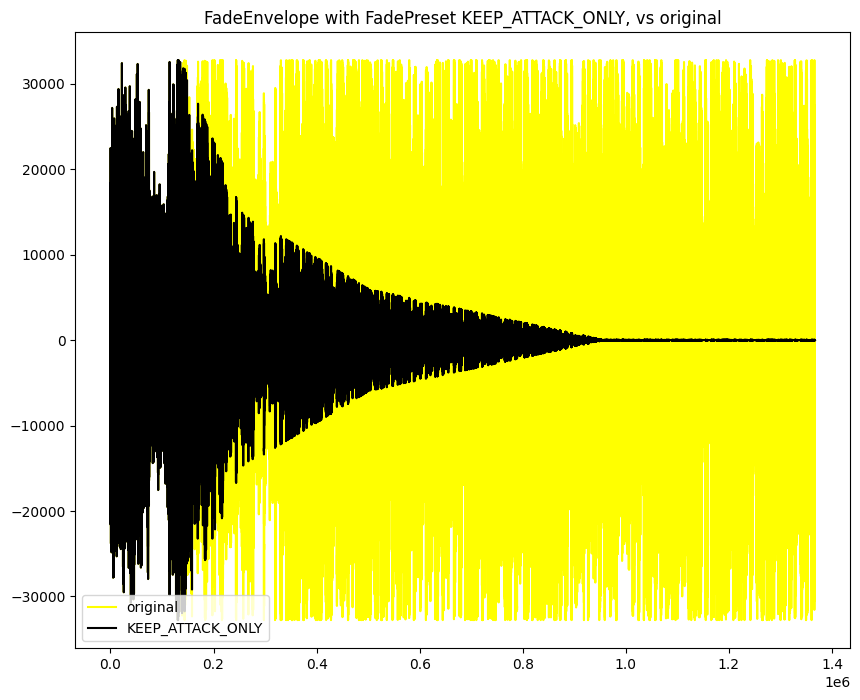

In [ ]:
from sudio.process.fx import FadeEnvelope, FadePreset
import matplotlib.pyplot as plt
import numpy as np


songseg = song[10:41]

# Predefined Envelope Presets
songseg_fade_envelope = songseg.afx(FadeEnvelope, preset=FadePreset.KEEP_ATTACK_ONLY)

su.echo(songseg_fade_envelope)

plt.figure(1, (10, 8))
with songseg.unpack() as songseg_data:
    with songseg_fade_envelope.unpack() as songseg_fade_envelope_data:
        plt.plot(songseg_data[0, :], color='yellow', label='original')
        plt.plot(songseg_fade_envelope_data[0, :], color='black', label='KEEP_ATTACK_ONLY')

plt.title('FadeEnvelope with FadePreset KEEP_ATTACK_ONLY, vs original')
plt.legend()

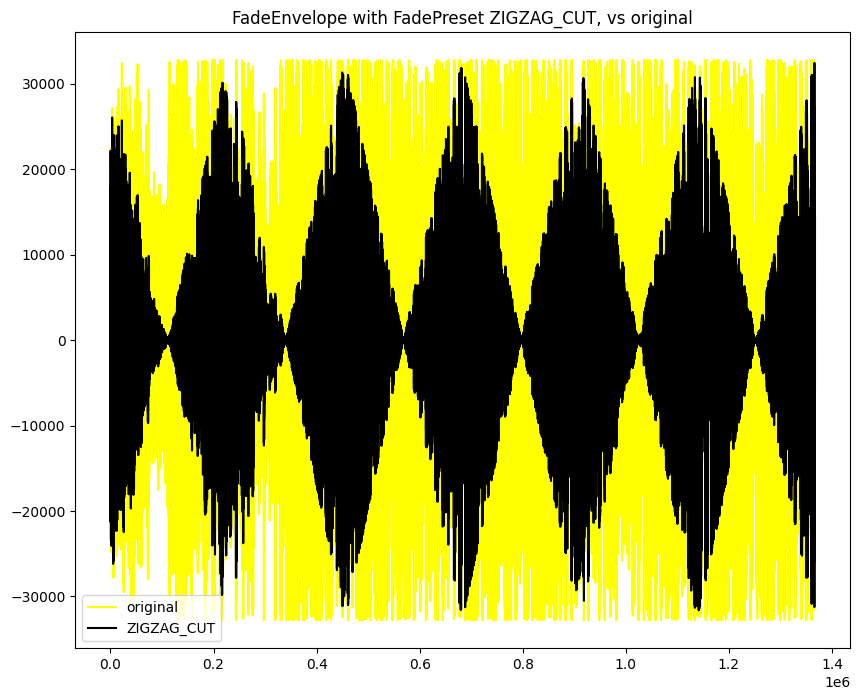

In [ ]:
from sudio.process.fx import FadeEnvelope, FadePreset
import matplotlib.pyplot as plt
import numpy as np


songseg = song[10:41]

# Predefined Envelope Presets
songseg_fade_envelope = songseg.afx(FadeEnvelope, preset=FadePreset.ZIGZAG_CUT)

# su.echo(songseg_fade_envelope)

plt.figure(1, (10, 8))
with songseg.unpack() as songseg_data:
    with songseg_fade_envelope.unpack() as songseg_fade_envelope_data:
        plt.plot(songseg_data[0, :], color='yellow', label='original')
        plt.plot(songseg_fade_envelope_data[0, :], color='black', label='ZIGZAG_CUT')

plt.title('FadeEnvelope with FadePreset ZIGZAG_CUT, vs original')
plt.legend()

c:\Users\Hossein\Documents\Programming\Py\sudio\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


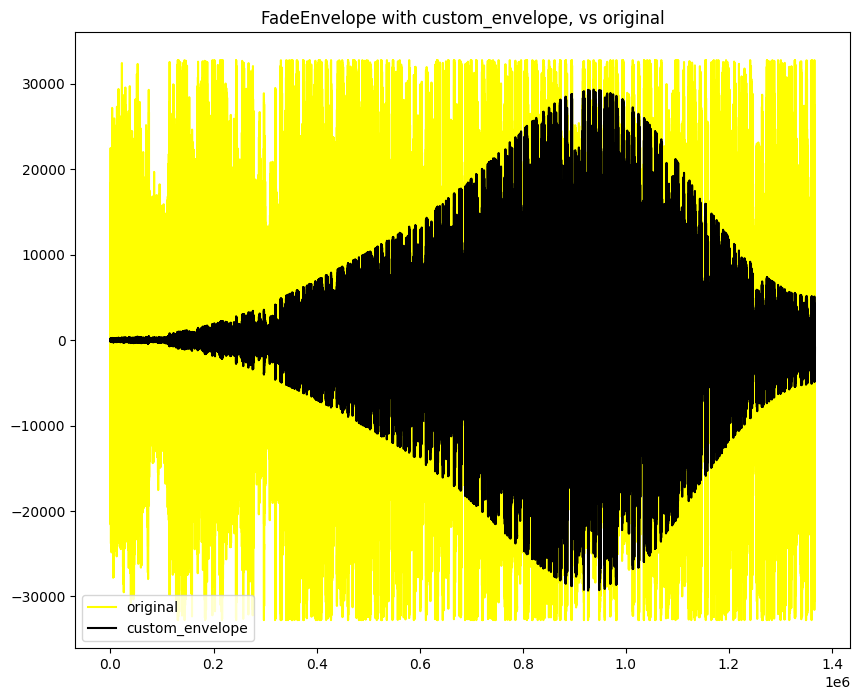

In [ ]:
from sudio.process.fx import FadeEnvelope, FadePreset
import matplotlib.pyplot as plt
import numpy as np


songseg = song[10:41]

custom_envelope = np.array([0.0, 0.0, 0.1, 0.2, 0.3, 0.7, 0.1, 0.0])
# Custom envelope with spline interpolation
songseg_fade_envelope = songseg.afx(FadeEnvelope, preset=custom_envelope, enable_spline=True, output_gain_db=6)

# su.echo(songseg_fade_envelope)

plt.figure(1, (10, 8))
with songseg.unpack() as songseg_data:
    with songseg_fade_envelope.unpack() as songseg_fade_envelope_data:
        plt.plot(songseg_data[0, :], color='yellow', label='original')
        plt.plot(songseg_fade_envelope_data[0, :], color='black', label='custom_envelope')

plt.title('FadeEnvelope with custom_envelope, vs original')
plt.legend()

The example demonstrates multiple techniques, including smooth fades, bell curve envelopes, attack preservation, and custom amplitude shaping with spline interpolation.
With fine-grained control over parameters like gain, time range, and interpolation methods, users can craft complex audio effects ranging from subtle amplitude adjustments to dramatic sound design.



____________________

In [ ]:
from sudio.process.fx import (
    PitchShifter,
    Tempo,
    ChannelMixer,
    FadeEnvelope,
    FadePreset
)

cool_remix = (
    song[:40]
    .afx(
        PitchShifter,
        semitones=-3
    ).afx(
        PitchShifter,
        start=2,
        duration=0.8,
        envelope=[0.8, 2, 1]
    ).afx(
        PitchShifter,
        start=10,
        duration=0.8,
        envelope=[0.65, 3, 1]
    ).afx(
        PitchShifter,
        start=20,
        duration=0.8,
        envelope=[2, 0.7, 1]
    ).afx(
        PitchShifter,
        start=30,
        duration=4,
        envelope=[1, 3, 1, 1]
    ).afx(
        Tempo,
        envelope=[1, 0.95, 1.2, 1]
    ).afx(
        FadeEnvelope,
        start=0,
        stop=10,
        preset=FadePreset.SMOOTH_FADE_IN
    )
)

side_slide  = (
    song[:10].afx(
        ChannelMixer,
        correlation=[[0.4, -0.6], [0, 1]]
    ).afx(
        FadeEnvelope,
        preset=FadePreset.SMOOTH_FADE_OUT
    )
)

cool_remix = side_slide  + cool_remix

# simple 4 band EQ
cool_remix = cool_remix[
        : '200': 'order=6, scale=0.7',
        '200':'800':'scale=0.5',
        '1000':'4000':'scale=0.4',
        '4000'::'scale=0.6'
    ]

su.export(
    cool_remix,
    'remix.mp3',
    quality=.8,
    bitrate=256
    )

su.echo(cool_remix)

 it used specialized effects like PitchShifter, which allows dynamic pitch alterations through static semitone shifts and dynamic pitch envelopes, Tempo for seamless time-stretching without pitch distortion, ChannelMixer to rebalance and spatialize audio channels, and FadeEnvelope for nuanced amplitude shaping. The remix workflow illustrates the library's flexibility by applying multiple pitch-shifting effects with varying start times and envelopes, dynamically adjusting tempo, introducing a smooth fade-in, creating a side-slide effect through channel mixing, and scaling different remix sections. By chaining these effects together with remarkable ease, developers and musicians can craft complex audio transformations, enabling intricate sound design and creative audio remixing with just a few lines of code.

## Audio Analysis

Perform simple analysis on audio files:

In [ ]:
# Song duration in  seconds
song.get_duration()

215.6932426303855

In [ ]:
# Sample rate in Hz
song.get_sample_rate()

44100

In [ ]:
song.get_nchannels()

2

This code demonstrates how to slice and play specific segments of an audio file using time-based indexing, similar to slicing lists in Python.

## Audio Format Conversion and Encoding

Let's explore how sudio handles different audio formats. We'll convert between MP3, WAV, FLAC, and OGG, and throw in some audio tweaks along the way.


In [ ]:
from sudio.types import FileFormat

# Slice and save as WAV
su.export(song[10.5: 30], 'cool_snippet.wav')

# Quiet it down and save as high-quality FLAC
su.export(song * -10.5, format=FileFormat.FLAC, quality=0.8)

# Convert to medium-quality OGG
su.export(song, 'medium_quality.ogg', quality=0.5)

# Convert to medium-quality mp3
su.export(song, 'medium_quality.mp3', quality=0.5, bitrate=64)

Pro tip: The second export creates a file named after the original, but with a .flac extension.

Remember, converting between lossy formats (like MP3 to OGG) might not sound great. For best results, start with high-quality or lossless files when possible.

